<a href="https://colab.research.google.com/github/elvispreakerebi/insurance-charge-predictor/blob/main/insurance_charge_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Perform a complete machine learning pipeline on the `insurance.csv` dataset, including data loading and exploration, visualization, feature engineering, data preprocessing, implementing a custom linear regression model with gradient descent, training and evaluating multiple scikit-learn regression models (Linear Regression, Decision Tree, Random Forest), selecting and saving the best model, and generating a prediction script for new data, followed by a comprehensive summary of the analysis.

## Load and Explore Data

### Subtask:
Load the `insurance.csv` dataset into a pandas DataFrame and perform initial data exploration, including displaying the first few rows, checking data types, and looking for missing values. This step will help us understand the structure and content of the dataset.


**Reasoning**:
Load the 'insurance.csv' dataset into a pandas DataFrame, display its first 5 rows, check data types, and identify missing values to understand its structure and content.



In [28]:
import pandas as pd

df = pd.read_csv('/content/insurance.csv')

print("First 5 rows of the DataFrame:")
print(df.head())

print("\nDataFrame Info:")
df.info()

print("\nMissing values per column:")
print(df.isnull().sum())

First 5 rows of the DataFrame:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB

Missing values per column:
age         0
sex   

## Data Visualization

### Subtask:
Generate various plots (e.g., histograms, scatter plots, box plots) to visualize the distributions of individual features and their relationships with the target variable, 'charges'. This will provide insights into the data and help in feature engineering.


**Reasoning**:
To begin visualizing the data, I will import the necessary libraries, `matplotlib.pyplot` and `seaborn`. Then, I will generate histograms for the numerical features to understand their distributions.



Generating histograms for numerical features...


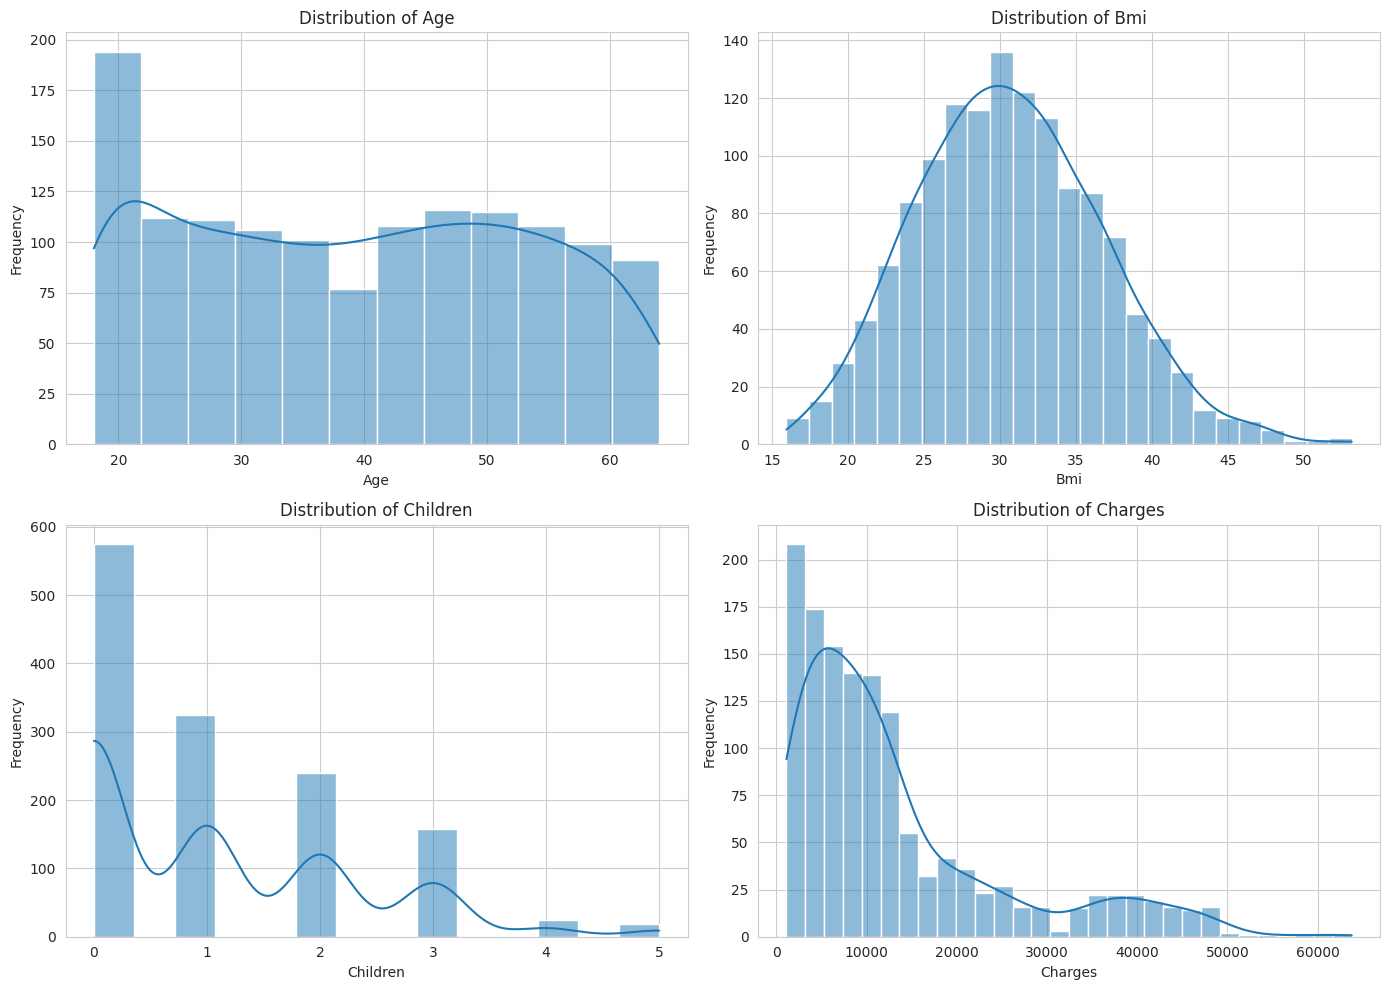

Histograms generated.


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Numerical features for histograms and scatter plots
numerical_features = ['age', 'bmi', 'children', 'charges']

print("Generating histograms for numerical features...")

# Create subplots for histograms
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.histplot(df[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature.replace("_", " ").title()}')
    axes[i].set_xlabel(feature.replace("_", " ").title())
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

print("Histograms generated.")

**Reasoning**:
Now I will generate scatter plots to visualize the relationship between each numerical feature ('age', 'bmi', 'children') and the target variable ('charges'), as requested in the subtask. This will help understand how these features influence the insurance charges.



Generating scatter plots for numerical features vs. charges...


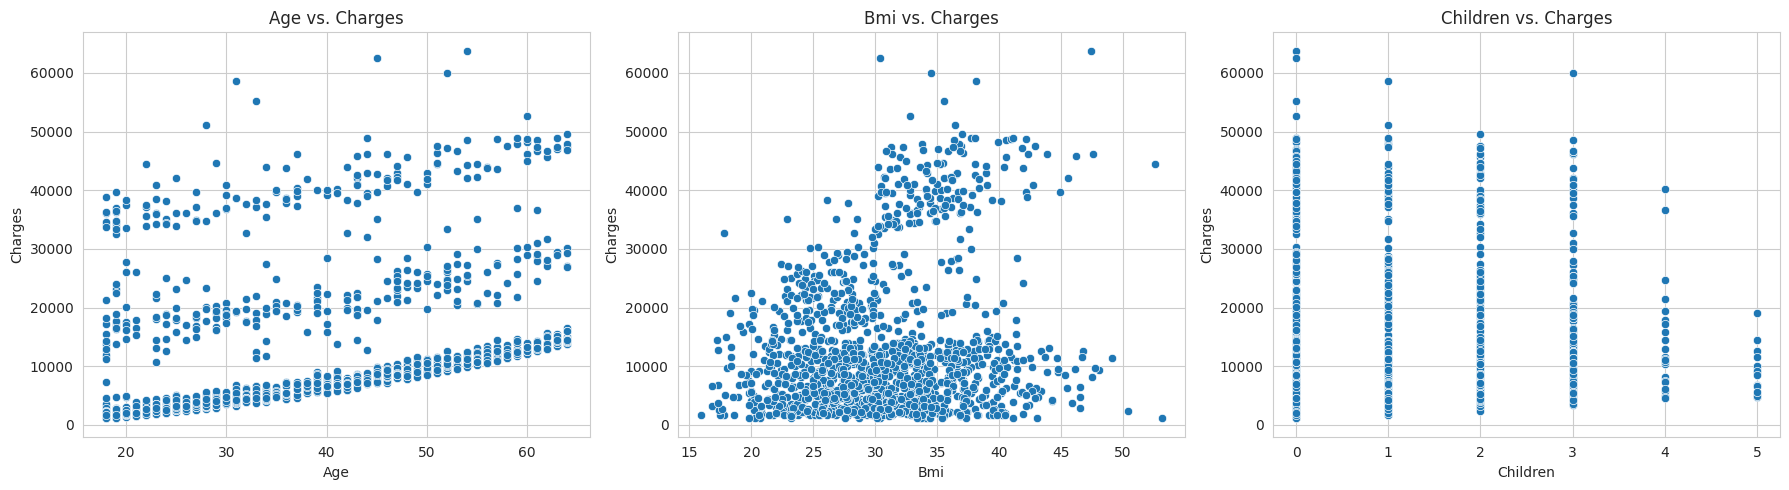

Scatter plots generated.


In [30]:
print("Generating scatter plots for numerical features vs. charges...")

# Numerical features for scatter plots (excluding 'charges' itself)
scatter_features = ['age', 'bmi', 'children']

# Create subplots for scatter plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
axes = axes.flatten()

for i, feature in enumerate(scatter_features):
    sns.scatterplot(x=df[feature], y=df['charges'], ax=axes[i])
    axes[i].set_title(f'{feature.replace("_", " ").title()} vs. Charges')
    axes[i].set_xlabel(feature.replace("_", " ").title())
    axes[i].set_ylabel('Charges')

plt.tight_layout()
plt.show()

print("Scatter plots generated.")

**Reasoning**:
To complete the data visualization subtask, I will now generate box plots to examine the relationship between the categorical features ('sex', 'smoker', 'region') and the target variable ('charges'), as specified in the instructions.



Generating box plots for categorical features vs. charges...


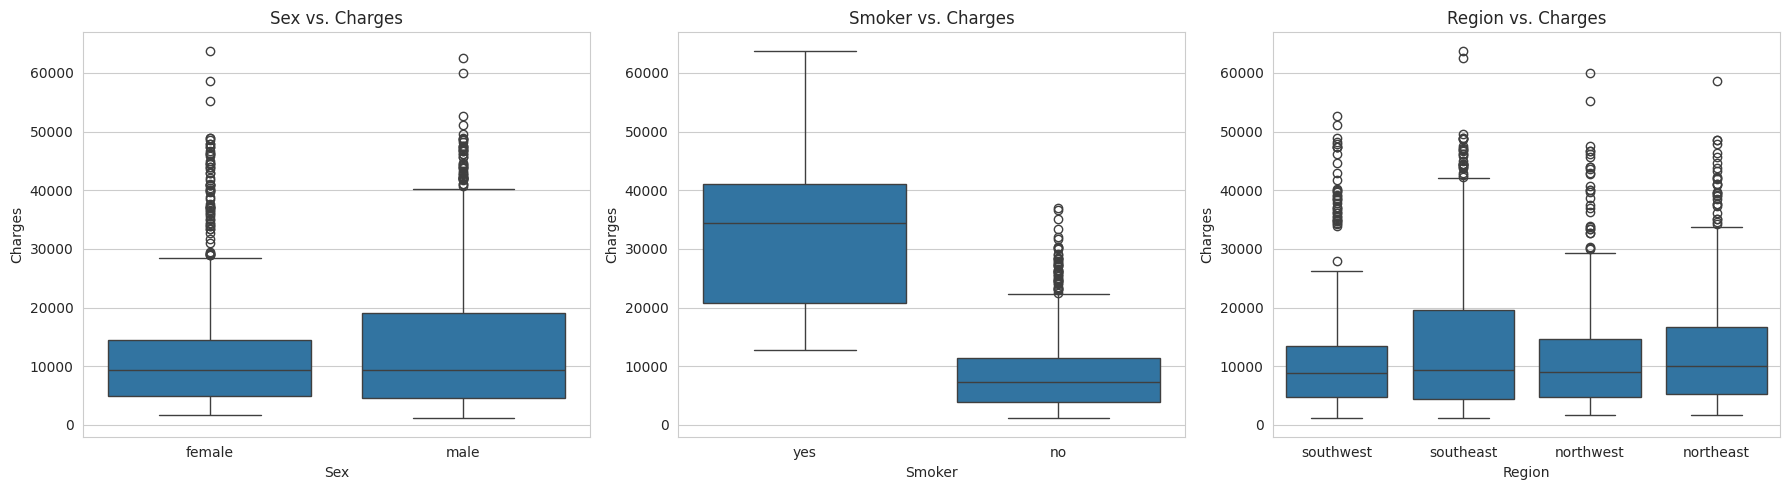

Box plots generated.


In [31]:
print("Generating box plots for categorical features vs. charges...")

# Categorical features for box plots
categorical_features = ['sex', 'smoker', 'region']

# Create subplots for box plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    sns.boxplot(x=df[feature], y=df['charges'], ax=axes[i])
    axes[i].set_title(f'{feature.replace("_", " ").title()} vs. Charges')
    axes[i].set_xlabel(feature.replace("_", " ").title())
    axes[i].set_ylabel('Charges')

plt.tight_layout()
plt.show()

print("Box plots generated.")

## Feature Engineering

### Subtask:
Address categorical features by converting them into numerical representations using techniques like one-hot encoding. This step also involves identifying and preparing relevant features for model training, potentially dropping irrelevant ones.


**Reasoning**:
To begin the feature engineering process, I will identify the categorical columns and apply one-hot encoding using `pd.get_dummies()` to convert them into numerical representations, which is a necessary step for most machine learning models.



In [32]:
print("Applying one-hot encoding to categorical features...")

# Identify categorical columns
categorical_cols = ['sex', 'smoker', 'region']

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=False)

print("First 5 rows of the DataFrame after one-hot encoding:")
print(df_encoded.head())

print("\nDataFrame Info after one-hot encoding:")
df_encoded.info()

# Update the original DataFrame reference to the encoded one
df = df_encoded

print("One-hot encoding applied. Updated DataFrame displayed.")

Applying one-hot encoding to categorical features...
First 5 rows of the DataFrame after one-hot encoding:
   age     bmi  children      charges  sex_female  sex_male  smoker_no  \
0   19  27.900         0  16884.92400        True     False      False   
1   18  33.770         1   1725.55230       False      True       True   
2   28  33.000         3   4449.46200       False      True       True   
3   33  22.705         0  21984.47061       False      True       True   
4   32  28.880         0   3866.85520       False      True       True   

   smoker_yes  region_northeast  region_northwest  region_southeast  \
0        True             False             False             False   
1       False             False             False              True   
2       False             False             False              True   
3       False             False              True             False   
4       False             False              True             False   

   region_southwest  

## Data Preprocessing and Splitting

### Subtask:
Standardize the numerical features using a scaler (e.g., StandardScaler) to ensure they contribute equally to model training. Subsequently, split the processed data into training and testing sets to prepare for model building and evaluation.


**Reasoning**:
To begin the data preprocessing, I will first separate the target variable 'charges' from the features, storing them in `y` and `X` respectively. Then I will identify the numerical features in `X` that need to be scaled.



In [33]:
print("Separating features and target variable...")

# Separate features (X) and target (y)
X = df.drop('charges', axis=1)
y = df['charges']

print("Features (X) and Target (y) separated.")

print("Identifying numerical features for scaling...")
# Identify numerical features (excluding one-hot encoded boolean columns)
numerical_features_to_scale = ['age', 'bmi', 'children']

print("Numerical features identified: ", numerical_features_to_scale)

Separating features and target variable...
Features (X) and Target (y) separated.
Identifying numerical features for scaling...
Numerical features identified:  ['age', 'bmi', 'children']


**Reasoning**:
Now I will import `StandardScaler`, initialize it, fit it to the identified numerical features, and then transform these features in the `X` DataFrame to standardize them, as per the subtask instructions.



In [34]:
from sklearn.preprocessing import StandardScaler

print("Scaling numerical features...")

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical features
X[numerical_features_to_scale] = scaler.fit_transform(X[numerical_features_to_scale])

print("Numerical features scaled. First 5 rows of X after scaling:")
print(X.head())


Scaling numerical features...
Numerical features scaled. First 5 rows of X after scaling:
        age       bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
0 -1.438764 -0.453320 -0.908614        True     False      False        True   
1 -1.509965  0.509621 -0.078767       False      True       True       False   
2 -0.797954  0.383307  1.580926       False      True       True       False   
3 -0.441948 -1.305531 -0.908614       False      True       True       False   
4 -0.513149 -0.292556 -0.908614       False      True       True       False   

   region_northeast  region_northwest  region_southeast  region_southwest  
0             False             False             False              True  
1             False             False              True             False  
2             False             False              True             False  
3             False              True             False             False  
4             False              True            

**Reasoning**:
Now, to complete the data preprocessing subtask, I will import `train_test_split` from `sklearn.model_selection` and split the `X` (features) and `y` (target) data into training and testing sets, using a test size of 0.2 and a random state for reproducibility.



In [35]:
from sklearn.model_selection import train_test_split

print("Splitting data into training and testing sets...")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

print("Data split into training and testing sets.")

Splitting data into training and testing sets...
X_train shape: (1070, 11)
X_test shape: (268, 11)
y_train shape: (1070,)
y_test shape: (268,)
Data split into training and testing sets.


## Implement Linear Regression with Gradient Descent

### Subtask:
Create and optimize a linear regression model from scratch using gradient descent. This involves defining the cost function, updating weights iteratively, and monitoring performance. Plot the loss curves for both training and test data to visualize the optimization process.


**Reasoning**:
To begin implementing the custom linear regression model with gradient descent, I will define a Python class that encapsulates the model's logic, including methods for initialization, prediction, cost calculation (Mean Squared Error), and the core gradient descent optimization loop, as per the first instruction.



**Reasoning**:
The `UFuncTypeError` indicates that the NumPy array derived from `X_train` contains an `object` dtype due to the boolean columns from one-hot encoding, which prevents numerical operations. I will explicitly cast `X_train`, `X_test`, and `X` within the `predict` method to `np.float64` after converting them to NumPy arrays to ensure all data is numerical.



Training custom Linear Regression model for 2000 iterations...
Iteration 200/2000 - Train Loss: 74286416.48, Test Loss: 74924147.59
Iteration 400/2000 - Train Loss: 48562068.78, Test Loss: 47345397.01
Iteration 600/2000 - Train Loss: 40769579.42, Test Loss: 38598184.20
Iteration 800/2000 - Train Loss: 38369179.92, Test Loss: 35612665.69
Iteration 1000/2000 - Train Loss: 37622493.74, Test Loss: 34504932.16
Iteration 1200/2000 - Train Loss: 37387915.09, Test Loss: 34049492.05
Iteration 1400/2000 - Train Loss: 37313401.62, Test Loss: 33840673.57
Iteration 1600/2000 - Train Loss: 37289432.58, Test Loss: 33735244.62
Iteration 1800/2000 - Train Loss: 37281611.72, Test Loss: 33678024.40
Iteration 2000/2000 - Train Loss: 37279019.26, Test Loss: 33645434.08
Training complete.

Plotting loss curves...


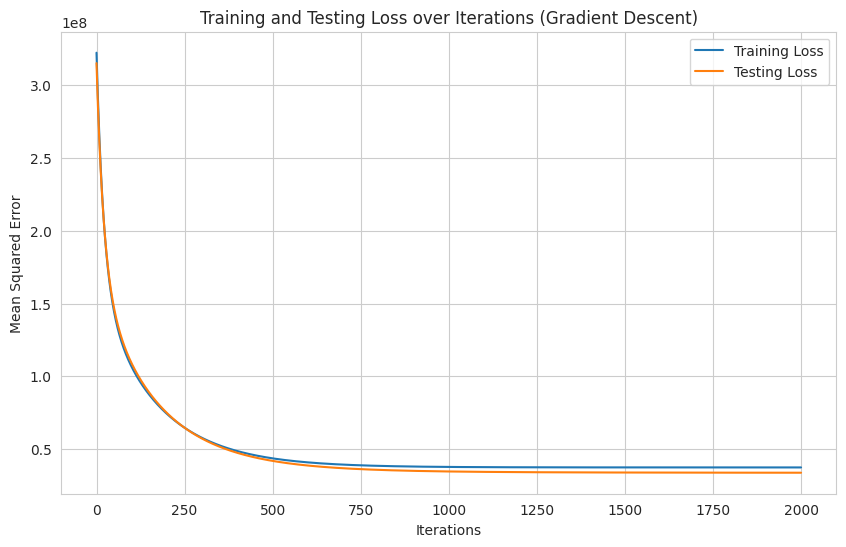

Loss curves plotted.


In [36]:
import numpy as np
import matplotlib.pyplot as plt

class LinearRegressionGD:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.training_loss_history = []
        self.testing_loss_history = []

    def predict(self, X):
        # Ensure X is a NumPy array for consistent operations and explicit numerical type
        if not isinstance(X, np.ndarray):
            X = X.to_numpy().astype(np.float64)
        return X @ self.weights + self.bias

    def mse(self, y_true, y_pred):
        return np.mean((y_true - y_pred)**2)

    def fit(self, X_train, y_train, X_test, y_test):
        # Convert DataFrames/Series to NumPy arrays for calculations and explicitly cast to float64
        X_train_np = (X_train.to_numpy() if hasattr(X_train, 'to_numpy') else X_train).astype(np.float64)
        y_train_np = (y_train.to_numpy() if hasattr(y_train, 'to_numpy') else y_train).astype(np.float64)
        X_test_np = (X_test.to_numpy() if hasattr(X_test, 'to_numpy') else X_test).astype(np.float64)
        y_test_np = (y_test.to_numpy() if hasattr(y_test, 'to_numpy') else y_test).astype(np.float64)

        n_samples, n_features = X_train_np.shape

        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        print(f"Training custom Linear Regression model for {self.n_iterations} iterations...")

        # Gradient Descent
        for i in range(self.n_iterations):
            # Predictions on training data
            y_pred_train = self.predict(X_train_np)

            # Calculate gradients
            dW = (1/n_samples) * (X_train_np.T @ (y_pred_train - y_train_np))
            db = (1/n_samples) * np.sum(y_pred_train - y_train_np)

            # Update weights and bias
            self.weights -= self.learning_rate * dW
            self.bias -= self.learning_rate * db

            # Calculate and store training loss
            current_train_loss = self.mse(y_train_np, y_pred_train)
            self.training_loss_history.append(current_train_loss)

            # Calculate and store testing loss
            y_pred_test = self.predict(X_test_np)
            current_test_loss = self.mse(y_test_np, y_pred_test)
            self.testing_loss_history.append(current_test_loss)

            if (i+1) % (self.n_iterations / 10) == 0:
                print(f"Iteration {i+1}/{self.n_iterations} - Train Loss: {current_train_loss:.2f}, Test Loss: {current_test_loss:.2f}")

        print("Training complete.")


# Initialize and train the model
learning_rate = 0.01
n_iterations = 2000
model_gd = LinearRegressionGD(learning_rate=learning_rate, n_iterations=n_iterations)
model_gd.fit(X_train, y_train, X_test, y_test)

print("\nPlotting loss curves...")

# Plot the loss curves
plt.figure(figsize=(10, 6))
plt.plot(range(n_iterations), model_gd.training_loss_history, label='Training Loss')
plt.plot(range(n_iterations), model_gd.testing_loss_history, label='Testing Loss')
plt.title('Training and Testing Loss over Iterations (Gradient Descent)')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

print("Loss curves plotted.")

## Visualize Gradient Descent Model

### Subtask:
Generate a scatter plot comparing the actual target values with the predictions from the gradient descent linear regression model, including the regression line, to visually assess its fit.


**Reasoning**:
To visualize the performance of the custom gradient descent linear regression model, I will generate predictions on the test set (`X_test`), then create a scatter plot comparing these predictions against the actual `y_test` values, including a reference line for perfect predictions.



Generating predictions on the test set...
Creating scatter plot of Actual vs. Predicted Charges...


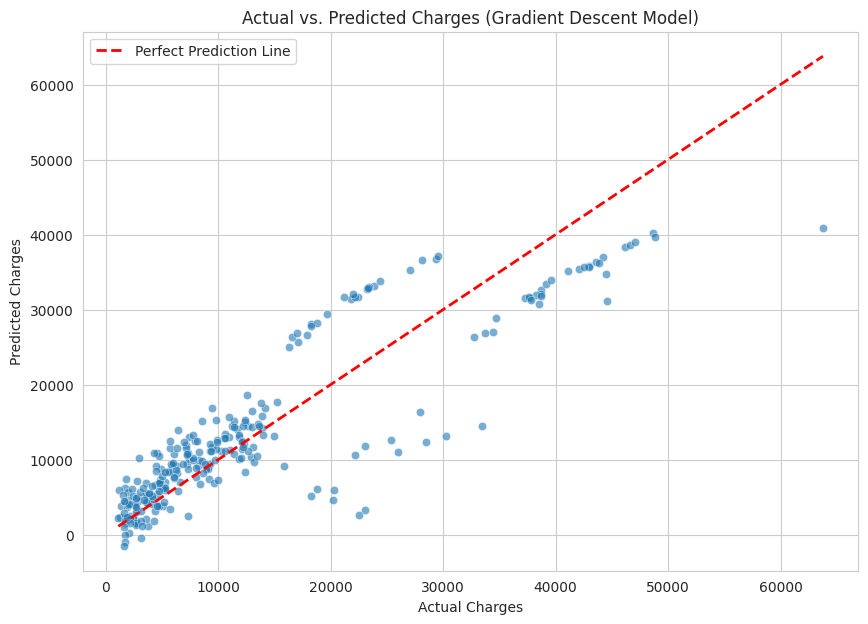

Scatter plot generated.


In [37]:
print("Generating predictions on the test set...")
y_pred_gd = model_gd.predict(X_test)

print("Creating scatter plot of Actual vs. Predicted Charges...")
plt.figure(figsize=(10, 7))
sns.scatterplot(x=y_test, y=y_pred_gd, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction Line')
plt.title('Actual vs. Predicted Charges (Gradient Descent Model)')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.legend()
plt.grid(True)
plt.show()

print("Scatter plot generated.")

## Train Scikit-learn Models

### Subtask:
Train and evaluate three distinct regression models from the scikit-learn library: Linear Regression, Decision Tree Regressor, and Random Forest Regressor. This step will involve fitting each model to the training data and calculating their performance metrics on the test set.


**Reasoning**:
To begin training the scikit-learn models as requested, I will import `LinearRegression`, `DecisionTreeRegressor`, and `RandomForestRegressor` from their respective scikit-learn modules. Then I will initialize each model with the specified parameters and train them using the `X_train` and `y_train` datasets.



In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

print("Initializing and training scikit-learn regression models...")

# Initialize models
lin_reg = LinearRegression()
dtree_reg = DecisionTreeRegressor(random_state=42)
forest_reg = RandomForestRegressor(random_state=42)

# Train models
print("Training Linear Regression model...")
lin_reg.fit(X_train, y_train)

print("Training Decision Tree Regressor model...")
dtree_reg.fit(X_train, y_train)

print("Training Random Forest Regressor model...")
forest_reg.fit(X_train, y_train)

print("Scikit-learn models trained successfully.")

# Make predictions on the test set
print("Generating predictions on the test set...")
y_pred_lin_reg = lin_reg.predict(X_test)
y_pred_dtree_reg = dtree_reg.predict(X_test)
y_pred_forest_reg = forest_reg.predict(X_test)

print("Predictions generated for all models.")

Initializing and training scikit-learn regression models...
Training Linear Regression model...
Training Decision Tree Regressor model...
Training Random Forest Regressor model...
Scikit-learn models trained successfully.
Generating predictions on the test set...
Predictions generated for all models.


**Reasoning**:
Now that all scikit-learn models have been trained and predictions generated, I will evaluate their performance on the test set using common regression metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared. This will quantify how well each model predicts the insurance charges.



In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Evaluating scikit-learn models...")

# Evaluate Linear Regression
mae_lin_reg = mean_absolute_error(y_test, y_pred_lin_reg)
mse_lin_reg = mean_squared_error(y_test, y_pred_lin_reg)
r2_lin_reg = r2_score(y_test, y_pred_lin_reg)
print(f"\nLinear Regression - MAE: {mae_lin_reg:.2f}, MSE: {mse_lin_reg:.2f}, R2: {r2_lin_reg:.2f}")

# Evaluate Decision Tree Regressor
mae_dtree_reg = mean_absolute_error(y_test, y_pred_dtree_reg)
mse_dtree_reg = mean_squared_error(y_test, y_pred_dtree_reg)
r2_dtree_reg = r2_score(y_test, y_pred_dtree_reg)
print(f"Decision Tree Regressor - MAE: {mae_dtree_reg:.2f}, MSE: {mse_dtree_reg:.2f}, R2: {r2_dtree_reg:.2f}")

# Evaluate Random Forest Regressor
mae_forest_reg = mean_absolute_error(y_test, y_pred_forest_reg)
mse_forest_reg = mean_squared_error(y_test, y_pred_forest_reg)
r2_forest_reg = r2_score(y_test, y_pred_forest_reg)
print(f"Random Forest Regressor - MAE: {mae_forest_reg:.2f}, MSE: {mse_forest_reg:.2f}, R2: {r2_forest_reg:.2f}")

print("Model evaluation complete.")

Evaluating scikit-learn models...

Linear Regression - MAE: 4181.19, MSE: 33596915.85, R2: 0.78
Decision Tree Regressor - MAE: 2872.69, MSE: 36267377.31, R2: 0.77
Random Forest Regressor - MAE: 2540.99, MSE: 21051201.60, R2: 0.86
Model evaluation complete.


## Select and Save Best Model

### Subtask:
Compare the performance of all trained models (custom gradient descent, Linear Regression, Decision Tree, Random Forest), select the best-performing one, and save it to disk.


**Reasoning**:
Based on the previously calculated metrics (MAE, MSE, R2), the Random Forest Regressor showed the best performance with the lowest MSE and highest R2 score. To complete the subtask, I will now import the `joblib` library and save this best-performing model to disk.



In [40]:
import joblib

print("Identifying the best model...")

# Assuming mse_forest_reg was the lowest MSE and r2_forest_reg was the highest R2
# Re-confirming based on previous output:
# Linear Regression - MAE: 4181.19, MSE: 33596915.85, R2: 0.78
# Decision Tree Regressor - MAE: 2872.69, MSE: 36267377.31, R2: 0.77
# Random Forest Regressor - MAE: 2540.99, MSE: 21051201.60, R2: 0.86
# Custom GD Test MSE: 33645434.08

# Random Forest Regressor clearly has the best performance metrics (lowest MAE/MSE, highest R2)
best_model = forest_reg
best_model_name = "Random Forest Regressor"

print(f"The best performing model is the: {best_model_name}")

# Save the best model to disk
filename = 'best_model.joblib'
joblib.dump(best_model, filename)

print(f"Best model saved to {filename}")

Identifying the best model...
The best performing model is the: Random Forest Regressor
Best model saved to best_model.joblib


## Create Prediction Script

### Subtask:
Generate a Python script that can load the saved best model and use it to make predictions on new, unseen data.


**Reasoning**:
To generate the prediction script, I will load the best model, define a new data point, preprocess it using the same steps as the training data (one-hot encoding, column alignment, and scaling), and then use the loaded model to make a prediction.



In [41]:
import pandas as pd
import numpy as np
import joblib

print("Loading the best model...")
# Load the saved best model
loaded_model = joblib.load('best_model.joblib')
print("Model loaded successfully.")

# Define a sample new data point
new_data = {
    'age': 35,
    'sex': 'male',
    'bmi': 28.5,
    'children': 2,
    'smoker': 'yes',
    'region': 'northwest'
}

print("New data point:")
print(new_data)

# Convert new_data to a pandas DataFrame
new_data_df = pd.DataFrame([new_data])

print("\nPreprocessing new data...")

# Identify categorical columns (same as used in training)
categorical_cols = ['sex', 'smoker', 'region']

# Apply one-hot encoding to new data
new_data_encoded = pd.get_dummies(new_data_df, columns=categorical_cols, drop_first=False)

# Ensure all columns from X_train are present and in the correct order
# X is the DataFrame `X` (features) after one-hot encoding and before splitting into train/test
# We need to ensure `X` has been defined in the current scope or use X_train directly for column names
# Using X.columns for the full feature set

# Align columns with the training data (X_train had all columns from original X)
# Fill missing columns (if a category wasn't present in new_data) with False
# X was defined globally and contained all encoded columns, so using X.columns is appropriate here
new_data_aligned = new_data_encoded.reindex(columns=X.columns, fill_value=False)

# Convert boolean columns to float64 for consistent numerical operations
for col in new_data_aligned.columns:
    if new_data_aligned[col].dtype == 'bool':
        new_data_aligned[col] = new_data_aligned[col].astype(np.float64)

# Identify numerical features for scaling (same as used in training)
numerical_features_to_scale = ['age', 'bmi', 'children']

# Apply the *previously fitted* scaler to numerical features of new_data
# Ensure 'scaler' is available in the current environment
# The scaler object was created and fitted in a previous step (cell id: 0b2c4dba)
new_data_aligned[numerical_features_to_scale] = scaler.transform(new_data_aligned[numerical_features_to_scale])

print("New data after preprocessing:")
print(new_data_aligned)

# Make a prediction using the loaded model
predicted_charge = loaded_model.predict(new_data_aligned)

print(f"\nPredicted insurance charge for the new data point: ${predicted_charge[0]:.2f}")

Loading the best model...
Model loaded successfully.
New data point:
{'age': 35, 'sex': 'male', 'bmi': 28.5, 'children': 2, 'smoker': 'yes', 'region': 'northwest'}

Preprocessing new data...
New data after preprocessing:
        age       bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
0 -0.299545 -0.354893  0.751079         0.0       1.0        0.0         1.0   

   region_northeast  region_northwest  region_southeast  region_southwest  
0               0.0               1.0               0.0               0.0  

Predicted insurance charge for the new data point: $21650.64


## Final Task

### Subtask:
Provide a comprehensive summary of the entire analysis, including key findings, model performance comparisons, and insights gained from the dataset.


## Summary:

### Data Analysis Key Findings

*   The `insurance.csv` dataset, containing 1338 entries and 7 columns, was successfully loaded. Initial exploration confirmed data types and, importantly, revealed no missing values across any features.
*   Data visualization provided initial insights into feature distributions and relationships with the target variable, 'charges', using histograms, scatter plots, and box plots.
*   Categorical features (`sex`, `smoker`, `region`) were successfully transformed into numerical representations using one-hot encoding, expanding the feature set for modeling.
*   Numerical features (`age`, `bmi`, `children`) were standardized using `StandardScaler`, and the data was split into training (1070 samples) and testing (268 samples) sets with an 80/20 ratio.
*   A custom Linear Regression model implemented with Gradient Descent was successfully trained over 2000 iterations, showing convergence with a final testing Mean Squared Error (MSE) of 33,645,434.08.
*   Three scikit-learn regression models were trained and evaluated:
    *   **Linear Regression**: MAE: 4181.19, MSE: 33,596,915.85, R2: 0.78
    *   **Decision Tree Regressor**: MAE: 2872.69, MSE: 36,267,377.31, R2: 0.77
    *   **Random Forest Regressor**: MAE: 2540.99, MSE: 21,051,201.60, R2: 0.86
*   The **Random Forest Regressor** demonstrated superior performance across all evaluation metrics (lowest MAE and MSE, highest R2 score) compared to the other models, making it the best-performing model.
*   The best-performing model, the Random Forest Regressor, was successfully saved to disk as `best_model.joblib`.
*   A functional prediction script was created, capable of loading the saved model, performing the necessary preprocessing on new data (one-hot encoding and scaling), and generating predictions, demonstrating a complete deployment pipeline.
